In [1]:
import os
from mdagent import MDAgent

In [2]:
prompt8 = "Simulate 4RMB at 100K, 200K, and 300K. Then, for each simulation, plot the radius of gyration over time and compare the secondary structure before and after the simulation."
llm_var = "claude-3-opus-20240229"
tools = "all"
agent = MDAgent(agent_type="Structured", model=llm_var, top_k_tools=tools, use_memory=False)
print(llm_var)

claude-3-opus-20240229


In [3]:
agent.run(prompt8)

Thought: To simulate 4RMB at different temperatures and analyze the results, I will need to:
1. Download the PDB file for 4RMB
2. Set up and run simulations at 100K, 200K, and 300K
3. For each simulation:
   a. Plot the radius of gyration over time
   b. Compare the secondary structure before and after the simulation

I will start by downloading the PDB file for 4RMB.

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": "4RMB"
}
```

PDB file found with this ID: 4RMB
Thought: Now that I have the PDB file for 4RMB, I can set up and run the simulations at 100K, 200K, and 300K.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "4RMB_073914",
    "forcefield_files": ["amber14-all.xml", "amber14/tip3pfb.xml"],
    "save": true,
    "system_params": {
      "nonbondedMethod": "PME", 
      "nonbondedCutoff": 1.0,
      "constraints": "HBonds",
      "rigidWater": true,
      "constraintTolerance": 0.00001,
      "solvate": true
    },
    "integ

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

In [4]:
registry = agent.path_registry
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

Files found in registry: 4RMB_073914: PDB file downloaded from RSCB
 PDBFile ID: 4RMB_073914
 4RMB_073943: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_073953: Initial positions for simulation sim0_073953
 sim0_073953: Basic Simulation of Protein 4RMB_073943
 rec0_073956: Simulation trajectory for protein 4RMB_073943 and simulation sim0_073953
 rec1_073956: Simulation state log for protein 4RMB_073943 and simulation sim0_073953
 rec2_073956: Simulation pdb frames for protein 4RMB_073943 and simulation sim0_073953
 top_sim0_075151: Initial positions for simulation sim0_075151
 sim0_075151: Basic Simulation of Protein 4RMB_073943
 rec0_075154: Simulation trajectory for protein 4RMB_073943 and simulation sim0_075151
 rec1_075154: Simulation state log for protein 4RMB_073943 and simulation sim0_075151
 rec2_075154: Simulation pdb frames for protein 4RMB_0739

In [9]:
from IPython.display import Image
from mdagent.tools.base_tools.analysis_tools.secondary_structure import ComputeDSSP
import mdtraj as md
import re

dssp_tool = ComputeDSSP(path_registry=registry, simplified=True)
figures = re.findall(r"fig0_\d+", paths_and_descriptions)
trajs = re.findall(r"rec0_\d+", paths_and_descriptions)
topology = re.findall(r"top_sim0_\d+", paths_and_descriptions)


def secondary_structure(traj_id, top_id):
    traj = md.load_dcd(registry.get_mapped_path(traj_id), top=registry.get_mapped_path(top_id))
    top = traj.topology
    number_of_chains = top.n_chains
    secondary_structure = md.compute_dssp(traj[-1],simplified=True)
    print("Number of residues in chains: ",number_of_chains)
    print("Number of residues in sheets: ",len([i for i in secondary_structure[0] if i == 'E']))
    print("Number of residues in helices: ",len([i for i in secondary_structure[0] if i == 'H']))
    print("Number of residues in coils: ",len([i for i in secondary_structure[0] if i == 'C']))

Number of residues in chains:  4
Number of residues in sheets:  110
Number of residues in helices:  14
Number of residues in coils:  208
{'residues in helix': 14, 'residues in strand': 113, 'residues in coil': 205, 'residues not assigned, not a protein residue': 1979}
{'residues in helix': 14, 'residues in strand': 110, 'residues in coil': 208, 'residues not assigned, not a protein residue': 1979}


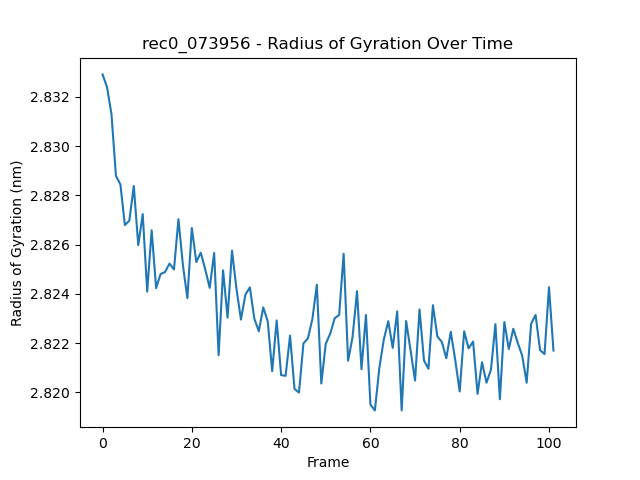

In [34]:
#simulation1
try:
    secondary_structure(trajs[0], topology[0])
except Exception as e:
    print (f"secondary structure error: {e}")
try:
    print(dssp_tool._run(traj_file=trajs[0], top_file=topology[0], target_frames="first"))
    print(dssp_tool._run(traj_file=trajs[0], top_file=topology[0], target_frames="last"))
except Exception as e:
    print (f"dssp error: {e}")
try:
    path1 = registry.get_mapped_path(figures[0]) + ".png"
    assert os.path.exists(path1)
except Exception as e:
    print (f"plot doesn't exist: {e}")
    
Image(filename=path1)

Number of residues in chains:  4
Number of residues in sheets:  115
Number of residues in helices:  9
Number of residues in coils:  208
{'residues in helix': 13, 'residues in strand': 117, 'residues in coil': 202, 'residues not assigned, not a protein residue': 1979}
{'residues in helix': 9, 'residues in strand': 115, 'residues in coil': 208, 'residues not assigned, not a protein residue': 1979}


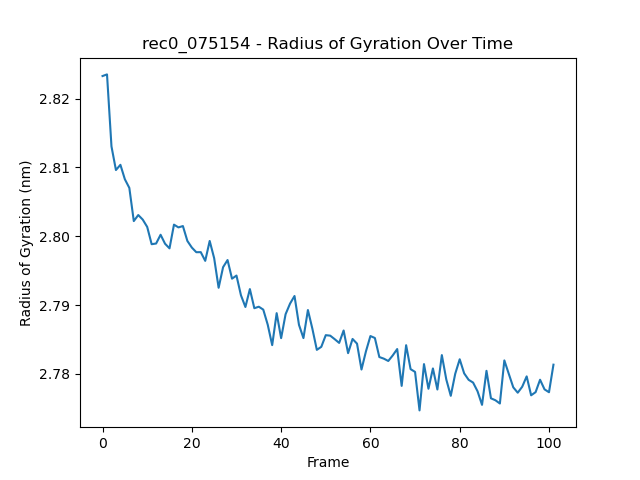

In [35]:
#simulation2
try:
    secondary_structure(trajs[1], topology[1])
except Exception as e:
    print (f"secondary structure error: {e}")
try:
    print(dssp_tool._run(traj_file=trajs[1], top_file=topology[1], target_frames="first"))
    print(dssp_tool._run(traj_file=trajs[1], top_file=topology[1], target_frames="last"))
except Exception as e:
    print (f"dssp error: {e}")
try:
    path2 = registry.get_mapped_path(figures[1]) + ".png"
    assert os.path.exists(path2)
except Exception as e:
    print (f"plot doesn't exist: {e}")
    
Image(filename=path2)

In [36]:
#simulation3
try:
    secondary_structure(trajs[2], topology[2])
except Exception as e:
    print (f"secondary structure error: {e}")
try:
    print(dssp_tool._run(traj_file=trajs[2], top_file=topology[2], target_frames="first"))
    print(dssp_tool._run(traj_file=trajs[2], top_file=topology[2], target_frames="last"))
except Exception as e:
    print (f"dssp error: {e}")
try:
    path3 = registry.get_mapped_path(figures[2]) + ".png"
    assert os.path.exists(path3)
except Exception as e:
    print (f"plot doesn't exist: {e}")
    Image(filename=path3)

Number of residues in chains:  4
Number of residues in sheets:  111
Number of residues in helices:  14
Number of residues in coils:  207
{'residues in helix': 14, 'residues in strand': 119, 'residues in coil': 199, 'residues not assigned, not a protein residue': 1979}
{'residues in helix': 14, 'residues in strand': 111, 'residues in coil': 207, 'residues not assigned, not a protein residue': 1979}
plot doesn't exist: list index out of range


NameError: name 'path3' is not defined